<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220520.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표 
* regression
* PCA

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
import sklearn.datasets as skd
import plotnine as gg
from plotnine import ggplot, aes
import plotnine.data as pld

# regression

In [11]:
raw = skd.load_wine()
x = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = raw['target']
x.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [12]:
x.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [14]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [16]:
fit_rf = RandomForestClassifier().fit(x_tr, y_tr)
pred_rf = fit_rf.predict(x_te)
proba_rf = fit_rf.predict_proba(x_te)

In [20]:
accuracy_score(y_tr, fit_rf.predict(x_tr)), accuracy_score(y_te, pred_rf)

(1.0, 0.9814814814814815)

# PCA

In [22]:
raw2 = skd.load_breast_cancer()
x = pd.DataFrame(raw2['data'], columns = raw2['feature_names'])
y = raw2['target']

In [23]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
pca = PCA(n_components = 10)
x_ = pca.fit_transform(x)
x_

array([[ 1.16014257e+03, -2.93917544e+02,  4.85783976e+01, ...,
         1.48167035e-01,  7.45463100e-01,  5.89359489e-01],
       [ 1.26912244e+03,  1.56301818e+01, -3.53945342e+01, ...,
         2.00803920e-01, -4.85827948e-01, -8.40347188e-02],
       [ 9.95793889e+02,  3.91567432e+01, -1.70975298e+00, ...,
        -2.74025583e-01, -1.73874273e-01, -1.86993508e-01],
       ...,
       [ 3.14501756e+02,  4.75535252e+01, -1.04424072e+01, ...,
        -4.42278787e-01, -9.73984733e-02, -1.44667285e-01],
       [ 1.12485812e+03,  3.41292250e+01, -1.97420874e+01, ...,
        -3.59964104e-01,  3.85030186e-01,  6.15467490e-01],
       [-7.71527622e+02, -8.86431064e+01,  2.38890319e+01, ...,
         3.00390899e-02, -4.23451051e-01, -3.01438975e-01]])

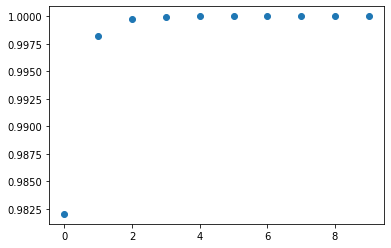

In [26]:
plt.plot(pca.explained_variance_ratio_.cumsum(), 'o')

In [29]:
res = pd.DataFrame(np.c_[y.reshape(-1,1), x_], columns = ['target'] + [f'pc{a}' for a in range(1,11)])
res.head()

,target,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,0.0,1160.142574,-293.917544,48.578398,-8.711975,32.000486,1.265415,0.931337,0.148167,0.745463,0.589359
1,0.0,1269.122443,15.630182,-35.394534,17.861283,-4.334874,-0.225872,-0.046037,0.200804,-0.485828,-0.084035
2,0.0,995.793889,39.156743,-1.709753,4.199340,-0.466529,-2.652811,-0.779745,-0.274026,-0.173874,-0.186994
3,0.0,-407.180803,-67.380320,8.672848,-11.759867,7.115461,1.299436,-1.267304,-0.060555,-0.330639,-0.144155
4,0.0,930.341180,189.340742,1.374801,8.499183,7.613289,1.021160,-0.335522,0.289109,0.036087,-0.138502


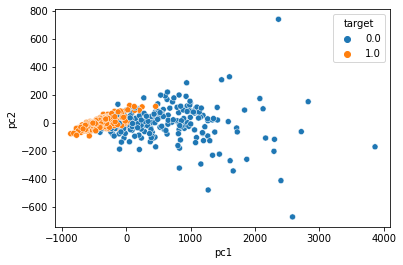

In [31]:
sns.scatterplot(data = res, x = 'pc1', y = 'pc2', hue = 'target')